<a href="https://colab.research.google.com/github/alanwuha/ce7455-nlp/blob/master/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to check if PyTorch is using the GPU?

Reference: [How to check if pytorch is using the gpu](https://stackoverflow.com/questions/48152674/how-to-check-if-pytorch-is-using-the-gpu)

In [0]:
import torch

In [0]:
torch.cuda.current_device()

0

In [0]:
torch.cuda.device(0)

In [0]:
torch.cuda.device_count()

1

In [0]:
torch.cuda.get_device_name(0)

'Tesla T4'

In [0]:
torch.cuda.is_available()

True

This tells us that the GPU `Tesla T4` is being used by `PyTorch`.

# Uploading files from your local file system

`files.upload` returns a dictionary of the files which were uploaded. The dictionary is keyed by the file name and values are the data which were uploaded.

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])
  ))

# Downloading files to your local file system

`files.download` will invoke a browser download of the file to your local computer.

In [0]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

# Google Drive

You can access files in Drive in a number of ways, including:
- Mounting your Google Drive in the runtime's virtual machine
- Using a wrapper around the API such as [PyDrive](#)
- Using the [native REST API](#)

Examples of each are below.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
with open('/content/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/foo.txt

Hello Google Drive!

In [9]:
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

All changes made in this colab session should now be visible in Drive.


# PyDrive

The examples below demonstrate authentication and file upload/download using PyDrive. More examples are available in the [PyDrive documentation](#).

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Authenticate and create the PyDrive client.

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Create and upload a text file.

In [14]:
uploaded = drive.CreateFile({'title': 'Sample upload.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1ryZf6-rhF8jfdSCbDxjOqeEExeCudZ4C


Load a file by ID and print its content.

In [15]:
downloaded = drive.CreateFile({'id': uploaded.get('id')})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Downloaded content "Sample upload file content"


# Google Sheets

Our examples below use the open-source [`gspread`](#) library for interacting with Google Sheets.

First, install the packaging using pip.

In [0]:
!pip install --upgrade --quiet gspread

Import the library, authenticate, and create the interface to Sheets.

In [0]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

Below is a small set of `gspread` examples. Additional examples are available at the [`gspread GitHub page`](#).

# Creating a new sheet with data from Python

In [0]:
sh = gc.create('My cool spreadsheet')

After executing the cell above, you will see a new spreadsheet named 'My cool spreadsheet' at [https://sheets.google.com](https://sheets.google.com).

Open our new sheet and add some random data.

In [23]:
worksheet = gc.open('My cool spreadsheet').sheet1

cell_list = worksheet.range('A1:C2')

import random
for cell in cell_list:
  cell.value = random.randint(1, 10)

worksheet.update_cells(cell_list)

{'spreadsheetId': '1M8t7HVYj7ggD8s0R4kkBkYmOg4hQeNLCF00Wndc9cxs',
 'updatedCells': 6,
 'updatedColumns': 3,
 'updatedRange': 'Sheet1!A1:C2',
 'updatedRows': 2}

# Downloading data from a sheet into Python as a Pandas DataFrame

Read back the random data that we inserted above and convert the resuilt into a [Pandas DataFrame](#).

In [24]:
worksheet = gc.open('My cool spreadsheet').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

import pandas as pd
pd.DataFrame.from_records(rows)

[['1', '8', '5'], ['3', '9', '5']]


,0,1,2
0,1,8,5
1,3,9,5


# Charting in Colaboratory

A common use for notebooks is data visualization using charts. Colaboratory makes this easy with several charting tools available as Python imports.

# Matplotlib

[Matplotlib](#) is the most common charting package, see its [documentation](#) for details, and its [examples](#) for inspiration.

# Line Plots

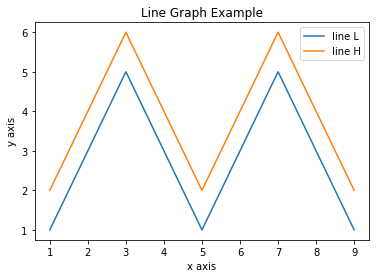

In [25]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y1 = [1, 3, 5, 3, 1, 3, 5, 3, 1]
y2 = [2, 4, 6, 4, 2, 4, 6, 4, 2]
plt.plot(x, y1, label="line L")
plt.plot(x, y2, label="line H")
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.legend()
plt.show()

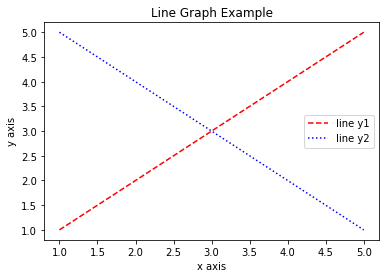

In [63]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y1 = [1, 2, 3, 4, 5]
y2 = [5, 4, 3, 2, 1]

plt.plot(x, y1, label="line y1", color='red', linestyle='dashed')
plt.plot(x, y2, label="line y2", color='blue', linestyle='dotted')
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.legend()
plt.show()

# Bar Plots

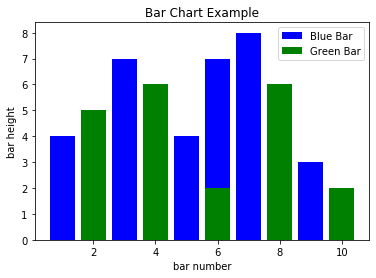

In [27]:
import matplotlib.pyplot as plt

# Look at index 4 and 6, which demonstrate overlapping cases.
x1 = [1, 3, 4, 5, 6, 7, 9]
y1 = [4, 7, 2, 4, 7, 8, 3]

x2 = [2, 4, 6, 8, 10]
y2 = [5, 6, 2, 6, 2]

# Colors: https://matplotlib.org/api/colors_apir.html

plt.bar(x1, y1, label="Blue Bar", color='b')
plt.bar(x2, y2, label="Green Bar", color='g')
plt.plot()

plt.xlabel('bar number')
plt.ylabel('bar height')
plt.title('Bar Chart Example')
plt.legend()
plt.show()

# Histograms

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# Use numpy to generate a bunch of random data in a bell curve around 5
n = 5 + np.random.randn(1000)

m = [m for m in range(len(n))]
plt.bar(m, n)
plt.title("Raw Data")
plt.show()

plt.hist(n, bins=20)
plt.title("Histogram")
plt.show()

plt.hist(n, cumulative=True, bins=20)
plt.title("Cumulative Histogram")
plt.show()

In [46]:
import numpy as np

# Mean = 5, Variance = 4
n = 5 + 2 * np.random.randn(1000)

print(n.mean(), n.var())

5.043589394483834 3.985423785116887


# Scatter Plots

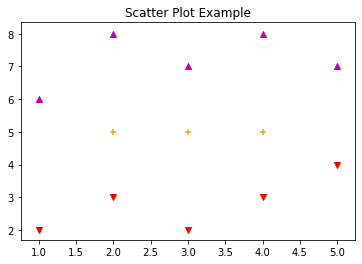

In [55]:
import matplotlib.pyplot as plt

x1 = [2, 3, 4]
y1 = [5, 5, 5]

x2 = [1, 2, 3, 4, 5]
y2 = [2, 3, 2, 3, 4]
y3 = [6, 8, 7, 8, 7]

# Markers: https://matplotlib.org/api/markers_api.html

plt.scatter(x1, y1, marker='+', color='orange')
plt.scatter(x2, y2, marker='v', color='red')
plt.scatter(x2, y3, marker='^', color='m')
plt.title('Scatter Plot Example')
plt.show()

# Stack Plots

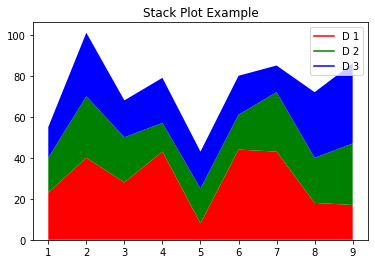

In [65]:
import matplotlib.pyplot as plt

idxes = [1, 2, 3, 4, 5, 6, 7, 8, 9]
arr1  = [23, 40, 28, 43,  8, 44, 43, 18, 17]
arr2  = [17, 30, 22, 14, 17, 17, 29, 22, 30]
arr3  = [15, 31, 18, 22, 18, 19, 13, 32, 39]

# Adding legend for stack plots is tricky.
plt.plot([], [], color='r', label='D 1')
plt.plot([], [], color='g', label='D 2')
plt.plot([], [], color='b', label='D 3')

plt.stackplot(idxes, arr1, arr2, arr3, colors=['r', 'g', 'b'])
plt.title('Stack Plot Example')
plt.legend()
plt.show()

# Pie Charts

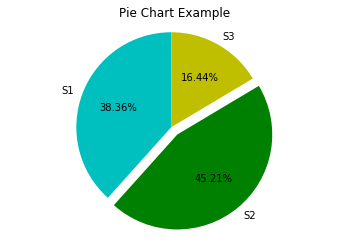

In [78]:
import matplotlib.pyplot as plt

labels = 'S1', 'S2', 'S3'
sections = [56, 66, 24]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle = 90,
        explode = (0, 0.1, 0),
        autopct = '%1.2f%%')

plt.axis('equal')
plt.title('Pie Chart Example')
plt.show()

# fill_between and alpha

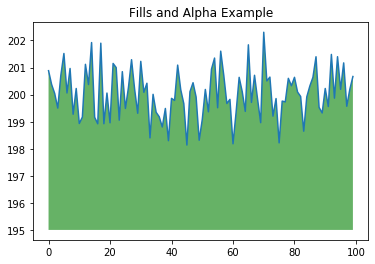

In [72]:
import matplotlib.pyplot as plt
import numpy as np

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Fills and Alpha Example")
plt.show()

# Seaborn

There are several libraries layered on top of Matplotlib that you can use in Colab. One that is worth highlighting is [Seaborn](#):

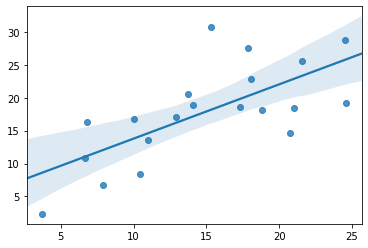

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Generate some random data
num_points = 20

# x will be 5, 6, 7... but also twiddled randomly
x = 5 + np.arange(num_points) + np.random.randn(num_points)

# y will be 10, 11, 12... but twiddled even more randomly
y = 10 + np.arange(num_points) + 5 * np.random.randn(num_points)

sns.regplot(x, y)
plt.show()

That's a simple scatterplot with a nice regression line fit to it, all with just one call to Seaborn's [regplot](#).

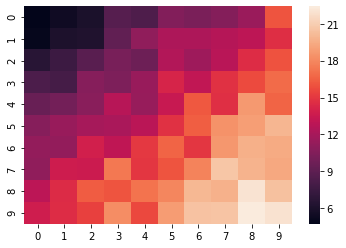

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Make a 10 x 10 heatmap of some random data
side_length = 10
# Start with a 10 x 10 matrix with values randomized around 5
data = 5 + np.random.randn(side_length, side_length)
# The next two lines make the values larger as we get closer to (9, 9)
data += np.arange(side_length)
data += np.reshape(np.arange(side_length), (side_length, 1))
# Generate the heatmap
sns.heatmap(data)
plt.show()